# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Import the relevant libraries

In [68]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sn

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [69]:
raw_data = pd.read_csv(r'C:\Users\Simbi\Documents\Example_bank_data.csv', index_col =0)

We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [70]:
data = raw_data.copy()
data.head()

,duration,y
0,117,no
1,274,yes
2,167,no
3,686,yes
4,157,no


In [71]:
data.shape

(518, 2)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518 entries, 0 to 517
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   duration  518 non-null    int64 
 1   y         518 non-null    object
dtypes: int64(1), object(1)
memory usage: 12.1+ KB


In [73]:
data.isnull().sum()

duration    0
y           0
dtype: int64

In [74]:
data.describe()

,duration
count,518.000000
mean,382.177606
std,344.295990
min,9.000000
25%,155.000000
50%,266.500000
75%,482.750000
max,2653.000000


In [75]:
data['subscribe'] =(data['y']=='yes').astype(int)
data['subscribe'].unique()

array([0, 1])

### Declare the dependent and independent variables

In [76]:
x =data['duration']
y= data['subscribe']

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

<Axes: xlabel='duration', ylabel='subscribe'>

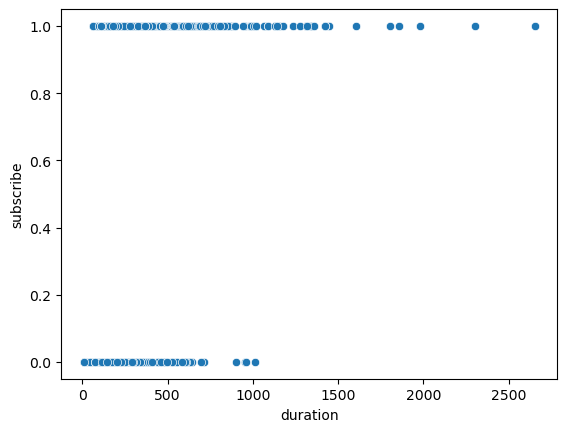

In [77]:
sn.scatterplot(data=data, x=x, y=y)

In [78]:
x = sm.add_constant (x)
logit_model = sm.Logit(y, x).fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [79]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:              subscribe   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Nov 2025   Pseudo R-squ.:                  0.2121
Time:                        13:39:33   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
